# Introduction
The "sms_spam_data.csv" dataset is a collection of text messages, specifically designed for 
the task of classifying SMS messages as either spam or not spam (ham). 
This dataset is commonly used in natural language processing and machine learning tasks, especially for binary text classification.

The dataset contains two main columns:

Label: This column indicates whether a particular SMS message is "spam" or "ham" (not spam). 
Spam messages typically consist of unsolicited advertisements, promotions, or other unwanted 
content, while ham messages are legitimate, non-spam messages sent by individuals or organizations.

Text: This column contains the actual text content of the SMS messages.
This text serves as the input data for training machine learning models to classify messages as spam or ham based on their content.

The goal when working with this dataset is to build a predictive model that can automatically
classify SMS messages as spam or ham based on their text content.
This type of classification can be helpful in filtering out unwanted spam messages and 
ensuring that users receive only legitimate and relevant SMS communications.

Typically, natural language processing techniques and machine learning algorithms, 
such as text preprocessing, feature extraction, and classification algorithms
(e.g., Naive Bayes, Support Vector Machines, or deep learning models), are used to create an
effective spam detection system using this dataset.

Researchers and practitioners often use this dataset to develop and evaluate the performance
of various text classification algorithms and spam detection techniques. It provides a 
valuable resource for understanding and addressing the problem of spam messages in SMS 
communications.






# Import libraries

In [1]:
import numpy as np  
import pandas as pd 

# Dataset

In [2]:
data = pd.read_csv("sms_spam_data.csv", encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

In [ ]:
# data cleaning 
# eda 
# text preprocessing  
# model buildding  
# evaluation 
# improvement 
# wbsite 
# deployment  

# 1.Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# as u can see here last three columns are null . so will drop it 

In [5]:
data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# now u can see columns are not decriptive so will rename their names. using rename func

In [7]:
data.rename(columns={"v1":"Target","v2":"Text"},inplace=True)
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# assigning label encoder to column=target 

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
data["Target"]=encoder.fit_transform(data["Target"])

In [10]:
data.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#  missing values 
data.isnull().sum()

Target    0
Text      0
dtype: int64

In [12]:
# duplicate values 
data.duplicated().sum()

403

In [13]:
data=data.drop_duplicates(keep="first")

In [14]:
data.duplicated().sum()

0

In [15]:
data.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
data.shape

(5169, 2)

# 2.EDA

In [17]:
data.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# ham is 4516 
# spaam is 635

In [18]:
data["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

# Piechart

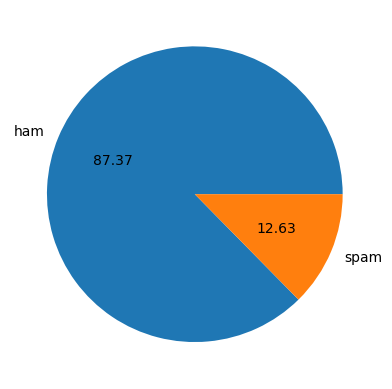

In [19]:
import matplotlib.pyplot as plt 
plt.pie(data["Target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [ ]:
# now we will analyse how much alphaets , words and sentances  are used in sms spam 

In [ ]:
# for that we will prepare three columns which will trell no of alphabets , no of words , no of sentences
# for that we are required a alibrary that is nltk libraray  naturallanguagetolkit 


In [20]:
import nltk

In [ ]:
# now in text column we will take the number of characters 

In [21]:
data["number_of_text"]=data["Text"].apply(len)

C:\Users\pant\AppData\Local\Temp\ipykernel_3480\3632844497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["number_of_text"]=data["Text"].apply(len)


In [22]:
data.head()

,Target,Text,number_of_text
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# now we will use nltk.word tokenize to fetch the no of words

In [23]:
data["no of word"]=data["Text"].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\pant\AppData\Local\Temp\ipykernel_3480\4106321362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["no of word"]=data["Text"].apply(lambda x:len(nltk.word_tokenize(x)))


In [24]:
data.head()

,Target,Text,number_of_text,no of word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# now we will use nltk.word tokenize to fetch the no of sentances 

In [25]:
data["no_of_sentences"]=data["Text"].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\pant\AppData\Local\Temp\ipykernel_3480\2131742310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["no_of_sentences"]=data["Text"].apply(lambda x:len(nltk.word_tokenize(x)))


In [26]:
data.head()

,Target,Text,number_of_text,no of word,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [27]:
data[["number_of_text","no of word","no_of_sentences"]].describe()

,number_of_text,no of word,no_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,18.453279
std,58.236293,13.324793,13.324793
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,9.000000
50%,60.000000,15.000000,15.000000
75%,117.000000,26.000000,26.000000
max,910.000000,220.000000,220.000000


In [ ]:
# description for ham messages ie 0. 

In [28]:
data[data["Target"]==0][["number_of_text","no of word","no_of_sentences"]].describe()

,number_of_text,no of word,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,17.120903
std,56.358207,13.493725,13.493725
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,90.000000,22.000000,22.000000
max,910.000000,220.000000,220.000000


In [ ]:
# spam ie 1 

In [30]:
data[data["Target"]==1][["number_of_text","no of word","no_of_sentences"]].describe()

,number_of_text,no of word,no_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,27.667688
std,30.137753,7.008418,7.008418
min,13.000000,2.000000,2.000000
25%,132.000000,25.000000,25.000000
50%,149.000000,29.000000,29.000000
75%,157.000000,32.000000,32.000000
max,224.000000,46.000000,46.000000


In [ ]:
# now we will histogram on data 

<Figure size 1200x600 with 0 Axes>

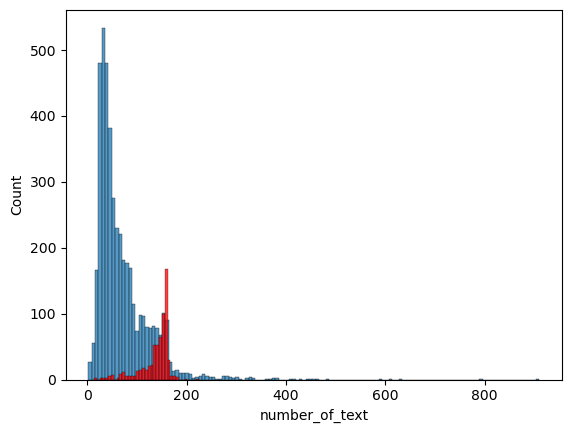

<Figure size 1200x600 with 0 Axes>

In [31]:
import seaborn as sns  
sns.histplot(data[data["Target"]==0]["number_of_text"])
sns.histplot(data[data["Target"]==1]["number_of_text"],color="red")
plt.figure(figsize=(12,6))


In [ ]:
# no of  word 

<Figure size 1200x600 with 0 Axes>

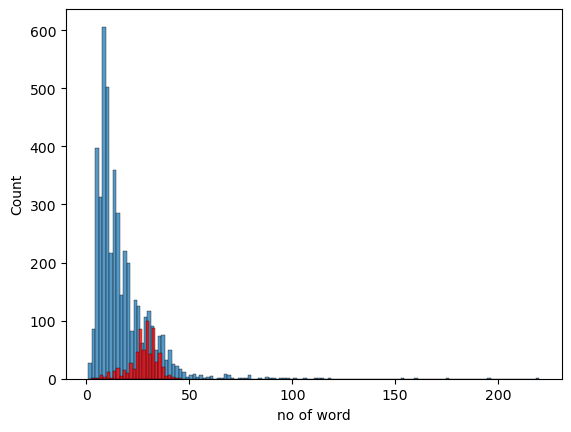

<Figure size 1200x600 with 0 Axes>

In [32]:
sns.histplot(data[data["Target"]==0]["no of word"])
sns.histplot(data[data["Target"]==1]["no of word"],color="red")
plt.figure(figsize=(12,6))

In [ ]:
# pairplot 

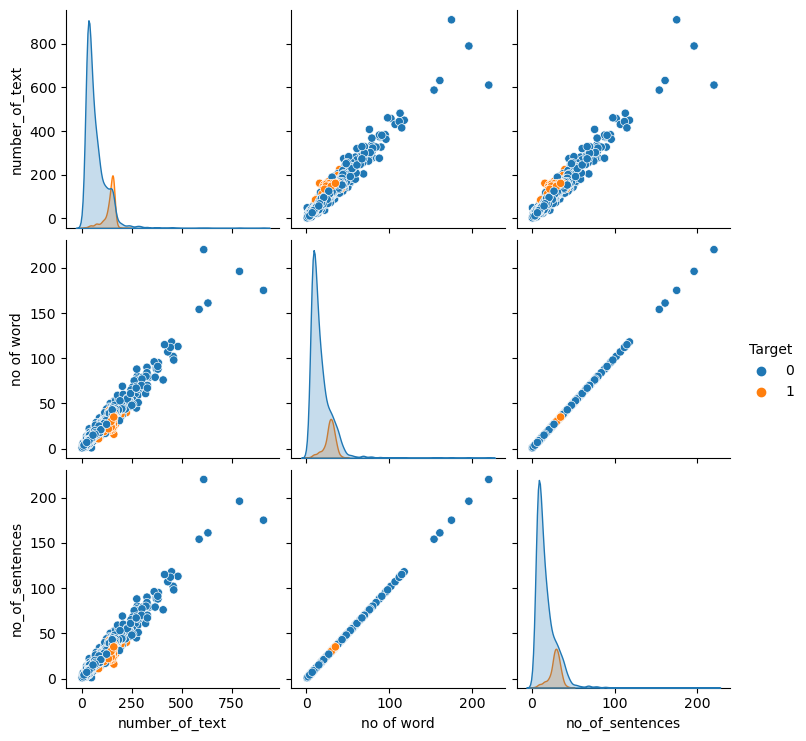

In [33]:
sns.pairplot(data,hue="Target")

In [ ]:
# heatmap correlation

In [34]:
data.corr()

C:\Users\pant\AppData\Local\Temp\ipykernel_3480\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Target,number_of_text,no of word,no_of_sentences
Target,1.000000,0.384717,0.262984,0.262984
number_of_text,0.384717,1.000000,0.965770,0.965770
no of word,0.262984,0.965770,1.000000,1.000000
no_of_sentences,0.262984,0.965770,1.000000,1.000000


C:\Users\pant\AppData\Local\Temp\ipykernel_3480\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

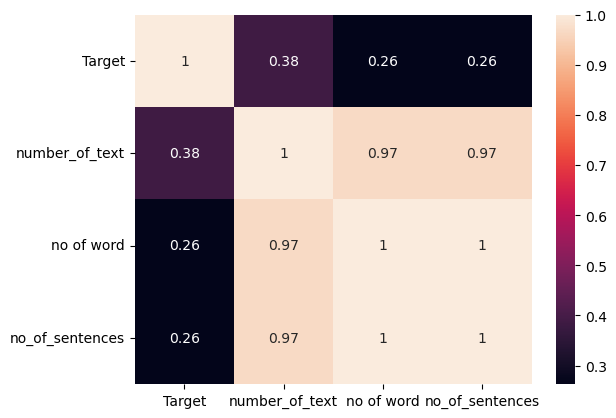

In [35]:
sns.heatmap(data.corr(),annot=True)

# Data preprocessing 
#lower case (convert into lower case)
#tokenization () words ko todna)
#removing special character (;""/)
#removing stopwords (is,of,and)
#stamming (dance , dancing, danced)

In [ ]:
# remove stopwords  first we will see what stopwords actly looks.
# using nltk

In [38]:
import nltk                         #i had dowm;loaded stopwords 
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from nltk.corpus import stopwords 
stopwords.words("english")      # u can use this code to see either it is has stopwords 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
import string 
string.punctuation   # use this code for punctuation  

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("dancing")

'danc'

In [44]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [47]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [55]:
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Initialize the Porter stemmer
stemmer = nltk.PorterStemmer()

# Define a function to perform stemming on a list of words
def transform_text(text):
    # Initialize a list to store the stemmed words
    stemmed_words = []
    
    # Iterate through each word in the input text
    for word in text:
        # Convert the word to lowercase
        word = word.lower()
        
        # Check if the word is alphanumeric and not a stopword or punctuation
        if word.isalnum() and word not in stopwords.words("english") and word not in string.punctuation:
            # Apply stemming to the word and append to the list
            stemmed_word = stemmer.stem(word)
            stemmed_words.append(stemmed_word)
    
    # Join the stemmed words back into a single string
    filtered_text = ' '.join(stemmed_words)
    
    return filtered_text

# Assuming "data" is your DataFrame and "Text" is the column containing a list of words
data["transformed_text"] = data["Text"].apply(lambda x: transform_text(x.split()))  # Split the text into words


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\pant\AppData\Local\Temp\ipykernel_3480\2793754650.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["transformed_text"] = data["Text"].apply(lambda x: transform_text(x.split()))  # Split the text into words


In [56]:
data.head()

,Target,Text,number_of_text,no of word,no_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe live around though


In [ ]:
# now wordcloud: it will show bigger words in the spam and ham 

In [57]:
from wordcloud import WordCloud 
wc= WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [58]:
spam_wc = wc.generate(data[data["Target"]==1]["transformed_text"].str.cat(sep=" "))

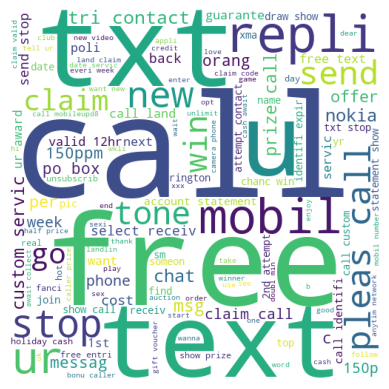

In [59]:
import matplotlib.pyplot as plt

# Assuming you have already created a WordCloud object 'wc'

# Display the WordCloud
plt.imshow(wc)
plt.axis('off')  # Turn off axis labels
plt.show()

In [61]:
ham_wc = wc.generate(data[data["Target"]==0]["transformed_text"].str.cat(sep=" "))

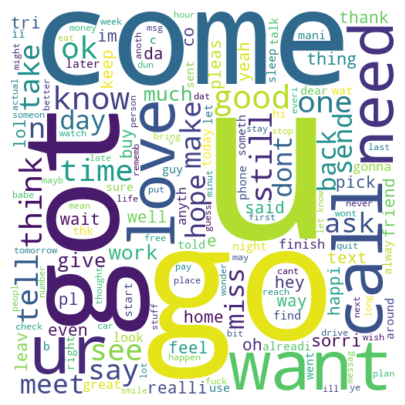

In [62]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# model buliding

In [ ]:
# here we will use nAIVE BYES in dataframe you can see that target is y is in numeric formm
#will convert transformned text in vectorisation (bag of words)  

In [69]:
# countvectorizer module for transformed_text
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
# will give x and y to model 

In [70]:
x = cv.fit_transform(data['transformed_text']).toarray()
y=data["Target"]

In [72]:
x.shape

(5169, 5643)

In [ ]:
# apply train test split 

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(x_test.shape)

(4135, 5643)
(1034, 5643)


In [ ]:
# now use naive byes 

In [74]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
model1=GaussianNB()
model2=MultinomialNB()


In [ ]:
# classification report of naive bayes

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7949709864603481
[[705 191]
 [ 21 117]]
0.37987012987012986


In [ ]:
# gaussiannb is very bad in accuracy and precision
# now will apply multinomial 

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
model2.fit(x_train,y_train)
y_pred1 = model2.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9632495164410058
[[877  19]
 [ 19 119]]
0.8623188405797102


In [ ]:
# lets apply random forest classifier  

In [80]:
from sklearn.ensemble import RandomForestClassifier
randomf=RandomForestClassifier(n_estimators=100)


In [ ]:
# classification report of random forest 

In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
randomf.fit(x_train,y_train)
y_pred1 = randomf.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.965183752417795
[[892   4]
 [ 32 106]]
0.9636363636363636


In [ ]:
# random forest is more better than naive bayes"s multinomial 

In [ ]:
# now apply decison tree classifier 

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy")

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
dt.fit(x_train,y_train)
y_pred1 = dt.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9506769825918762
[[882  14]
 [ 37 101]]
0.8782608695652174


In [ ]:
# not that good still random forest is better 

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [86]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'LR': lrc, 
    'AdaBoost': abc, 
    'GBDT':gbdt
    
}

In [87]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [89]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9187620889748549, 0.6985294117647058)

In [91]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9187620889748549
Precision -  0.6985294117647058
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  LR
Accuracy -  0.9729206963249516
Precision -  0.9661016949152542
For  AdaBoost
Accuracy -  0.9574468085106383
Precision -  0.9272727272727272
For  GBDT
Accuracy -  0.9448742746615088
Precision -  0.945054945054945


In [94]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision')

In [95]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.918762,0.698529
3,AdaBoost,0.957447,0.927273
4,GBDT,0.944874,0.945055
2,LR,0.972921,0.966102
1,KN,0.906190,1.000000


In [ ]:
# random forest giving 96% of accuracy and 96% of  and  precision of 96% 